!pip install blpapi --index-url=https://bcms.bloomberg.com/pip/simple/

!pip install xbbg

### Extract Data from Bloomberg

In [ ]:
from xbbg import blp
import data_handler

In [ ]:
date = '2024-03-26'
raw = data_handler.raw_snapshot('HSI Index', date)

output = open('raw.pkl', 'wb')
pickle.dump(raw, output)
output.close()

### Implied Volatility

In [1]:
import black_scholes
import pickle
import numpy as np

In [2]:
pkl_file = open('raw.pkl', 'rb')
raw = pickle.load(pkl_file)

In [3]:
imp_vol_sur = black_scholes.implied_vol_surface(raw)
imp_vol_sur.root_finding('secant')

C:\Users\user\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:361: RuntimeWarning: Tolerance of 0.00012099999999998223 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\user\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:361: RuntimeWarning: Tolerance of 16042976675971.223 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\user\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:361: RuntimeWarning: Tolerance of 816910040842.3612 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\user\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:361: RuntimeWarning: Tolerance of 10242682708.72238 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\user\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:361: RuntimeWarning: Tolerance of 6021348.890187866 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\user\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:361: RuntimeWarning: Tolerance of 5049835657.681949 reached.
  warnings.warn(msg, Ru

In [4]:
set(imp_vol_sur.days_to_exp)

{1, 34, 93, 185}

In [5]:
from itertools import compress
[(x,y) for x,y in zip(list(compress(imp_vol_sur.imp_vol_put_asks, [93 == x for x in imp_vol_sur.days_to_exp])), list(compress(imp_vol_sur.strikes, [93 == x for x in imp_vol_sur.days_to_exp])))]

[(0.22332844711209798, 15000),
 (0.22217779343033284, 15100),
 (0.22124278804323047, 15200),
 (0.22086783385760336, 15300),
 (0.22018993042942578, 15400),
 (0.21922024610217658, 15500),
 (0.21868272792074953, 15600),
 (0.21747474106398798, 15700),
 (0.21630989345203971, 15800),
 (0.21615376399396935, 15900),
 (0.21692282716778352, 16000),
 (0.21729333994323552, 16100),
 (0.2157292201812107, 16200),
 (0.21599336245452788, 16300),
 (0.2168034061223327, 16400),
 (0.21663861000842108, 16500),
 (0.21672792200447102, 16600),
 (0.21616881448419506, 16700),
 (0.21830137691902043, 16800),
 (0.22531164941590323, 16900),
 (0.22566191925556894, 17000),
 (0.22572960297556696, 17100),
 (0.22583422254262328, 17200),
 (0.2320535610974812, 17300),
 (nan, 17400),
 (nan, 17500),
 (nan, 17600),
 (nan, 17700),
 (nan, 17800),
 (nan, 17900),
 (0.2208048509903087, 18000),
 (nan, 18100),
 (nan, 18200)]

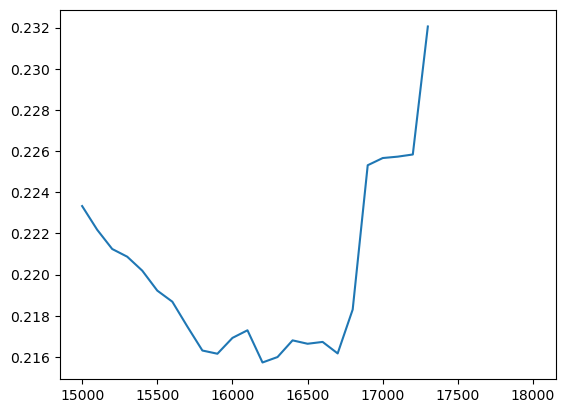

In [8]:
import matplotlib.pyplot as plt
plt.plot(list(compress(imp_vol_sur.strikes, [93 == x for x in imp_vol_sur.days_to_exp])), list(compress(imp_vol_sur.imp_vol_put_asks, [93 == x for x in imp_vol_sur.days_to_exp])))